In [1]:
# Import Python libaries
%matplotlib inline

# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import ensemble
from xgboost import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

# Machine learning & model visualization tools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
import pydot
import math
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
# from sklearn.externals import joblib
# Miscellaneous
import os
import io
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.inspection import partial_dependence, plot_partial_dependence

/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
2022-11-02 16:01:31.816383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-02 16:01:31.816404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dropped = ['Atmosphere', 'Mass', 'Init_R', 'Fin_R', 'Voltage', 'Res_Volt', 'PulseTime_I', 'I_Mean']
def import_file(filename):
    # Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'Charge_Tot', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 
                'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    
    
    
    # Drop problematic data for this particular analysis
    dropped_features = ['Atmosphere', 'Res_Drop',
             'PulseTime_I', 'I_Mean', 'Maxima']
    df = df.drop(dropped_features, axis=1)
    
    
    
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    try:
        df = df.drop('Sample', axis = 1)
    except:
        pass
    df = df.drop('Tube Diam', axis = 1)
    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def import_file_noOneHot(filename):
# Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    # Drop problematic data for this particular analysis
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    try:
        df = df.drop('Map File ID', axis = 1)
    except:
        pass
    df = df.drop('Tube Diam', axis = 1)
    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    # df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def categorize_yield(df):
    yield_cat = []
    for i in range(0, len(df)):
        if df['Graphene_Yield'][i] < 50:
            yield_cat.append(0)
        elif df['Graphene_Yield'][i] < 50 and df['TwoDtoG'][i] < 0.8:
            yield_cat.append(1)
        else:
            yield_cat.append(2)
    print(len(df))
    print(len(yield_cat))
    df['Yield_Cat'] = yield_cat
    
def leave_one_out_proc(clf):
    # Leave one out evaluation
    # enumerate splits
    y_true, y_pred = list(), list()
    # Create leave one out procedure
    cv = LeaveOneOut()
    for train_ix, test_ix in cv.split(features):
        # split data
        train_features, test_features = features[train_ix, :], features[test_ix, :]
        train_labels, test_labels = labels[train_ix], labels[test_ix]
        clf.fit(train_features, train_labels)
        # evaluate model
        yhat = clf.predict(test_features)
        # store
        y_true.append(test_labels[0])
        y_pred.append(yhat[0])
    print('doneskies')
    return y_true, y_pred, clf

def category_normalization_theonesyoualwaysuse(df):
    groups = df.groupby(['Material'])
    norm_I_Max = []
    norm_charge_tot=[]
    for name, group in groups:
        I_Max_array = np.asfarray(group.I_Max)
        charge_tot_array = np.asfarray(group.Charge_Tot)
        mean_I_Max = np.mean(I_Max_array)
        mean_charge_tot = np.mean(charge_tot_array)
        std_I_Max = np.std(I_Max_array)
        std_charge_tot = np.std(charge_tot_array)
        print("Mean of ", name, "is ", mean_I_Max)
        norm_I_Max_cat = np.divide(np.subtract(I_Max_array, mean_I_Max), std_I_Max)
        norm_charge_tot_cat = np.divide(np.subtract(charge_tot_array, mean_charge_tot), std_charge_tot)
        norm_I_Max = np.append(norm_I_Max, norm_I_Max_cat)
        norm_charge_tot = np.append(norm_charge_tot, norm_charge_tot_cat)
    return norm_I_Max, norm_charge_tot

def category_normalization_mass(df):
    groups = df.groupby(['Material'])
    norm_array = []
    for name, group in groups:
        yield_array = np.asfarray(group.Mass)
        mean_yield = np.mean(yield_array)
        std_yield = np.std(yield_array)
        print("Mean of ", name, "is ", mean_yield)
        norm_yield_cat = np.divide(np.subtract(yield_array, mean_yield), std_yield)
        norm_array = np.append(norm_array, norm_yield_cat)
    return norm_array

In [4]:
# Import file
filename='FJH_ML_Final.csv'
df1 = import_file_noOneHot(filename)
Imax, chargetot = category_normalization_theonesyoualwaysuse(df1)
yield_array = category_normalization_mass(df1)
df = import_file(filename)
# df['Norm_I_Max'] = Imax
df['Norm_charge_tot'] = df['Charge_Tot']/(df['Mass'])*1000
df['Norm_I_Max'] = df['I_Max']/df['Mass']*1000
# df['Discharge_Rate'] = (df['Volt_Drop']/df['Mass'])/df['PulseTime']
# df['norm_mass'] = yield_array
# df['cap_energy'] = 0.5*df['Voltage']*df['Voltage']*df['Cap']/df['Mass']
df['charge_density'] = df['Voltage']*df['Cap']/df['Mass']
# df['charge_density2'] = df['Volt_Drop']*df['Cap']/df['Mass']
# df['RC'] = df['Init_R']*df['Cap']
# df['test_feature'] = 1/df['Mass']
df['Final_Current_Percent'] = df['I_Final']/df['I_Max']
# df['discharge_per'] = df['Res_Volt']/df['Voltage']
# df['Pretreat_CD'] = df['Pretreat_highest']*df['Cap']/df['Mass']
# df['inv_Mass'] = 1/df['Mass']
# df['average_res'] = (df['Init_R']+df['Fin_R'])/2
# df['Power'] = df['I_Max']*df['I_Max']*df['average_res']/df['Mass']
# df = df.drop('average_res', axis=1)
# df['test_feature'] = df['Res_Volt']/df['Voltage']
# df = df.drop('norm_mass', axis=1)
# Drop stuff
df = df.drop('Voltage', axis=1)
df = df.drop('Res_Volt', axis=1)
# df = df.drop('Norm_I_Max', axis=1)
df = df.drop('Volt_Drop', axis=1)
df = df.drop('Mass', axis=1)
df = df.drop('Cap', axis=1)
df = df.drop('PulseTime', axis=1)
df = df.drop('I_Final', axis=1)
df = df.drop('Fin_R', axis=1)
df = df.drop('Init_R', axis=1)
df = df.drop('Pretreat_highest', axis=1)
df = df.drop('Pretreat_voltage', axis=1)

# Why he droped Material_PA and Material_TCB?
df = df.drop('Material_PA', axis=1)
df = df.drop('Material_TCB', axis=1)


# df = df.drop('Norm_charge_tot', axis=1)
df = df.drop('Charge_Tot', axis=1)
# df = df.drop('Final_Current_Percent', axis=1)
# df = df.drop('charge_density', axis=1)
# df = df.drop('average_res', axis=1)""
# df['FJH_Power'] = df['I_Max']*df['I_Max']*df['Init_R']
# df = df[df['Graphene_Yield']>20]

# Print stats
print(df.shape)
print(df.head())
# print(len(df))
print(sum(df['Material_MC']))

Mean of  CB is  199.5962952631579
Mean of  MC is  548.2808046511627
Mean of  PA is  301.9472116666666
Mean of  TCB is  217.5159437837838
Mean of  CB is  186.9859649122807
Mean of  MC is  276.5790697674419
Mean of  PA is  283.28055555555557
Mean of  TCB is  319.81081081081084
(173, 13)
   Yield  Yield_Per      I_Max  Graphene_Yield   TwoDtoG      DtoG    FWHM 2D  \
0   77.0  38.500000  149.36410       85.714286  0.798070  0.546842  52.940275   
1  147.2  90.920321   88.60687        1.010101  0.458187  0.912020   0.000000   
2  168.0  84.000000   88.60687       34.920635  0.650986  0.746614  40.452173   
3   54.0  27.000000  102.74530       79.365079  0.763019  0.661025  50.596165   
4  128.7  68.823529   70.26505       25.396825  0.646567  0.500579  40.277124   

   Material_CB  Material_MC  Norm_charge_tot  Norm_I_Max  charge_density  \
0            1            0        80.159727  746.820500      112.800000   
1            1            0        13.029621  547.293823       84.496603   

In [8]:
# Let's start the actual ML
# Labels are the values we want to predict
output = "Graphene_Yield"
if output != "Graphene_Yield":
    df = df[df['Graphene_Yield']>40]
labels = np.array(df[output])
labels = np.asfarray(labels)

# Remove the labels from the features
# axis 1 refers to the columns
# Drop all "output" type variables as well
outputs = ['Yield', 'Graphene_Yield', 'TwoDtoG', 'DtoG', 'FWHM 2D', 'Yield_Per', 'I_Max']
df = df.drop(outputs, axis=1)
# df = df.drop('Yield_Cat', axis=1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array

features = np.array(df)
features = np.asfarray(features)
# features = preprocessing.scale(features)
# labels = preprocessing.scale(labels)

# Standardize model
# scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
# features = scaler.fit_transform(features)
# Scale y values labels = scaler.fit_transform(labels.reshape(-1,1))
# print("Mean of y: ", np.mean(labels))
# print("Standard deviation of y: ", np.std(labels))
print("Mean of feature 1: ", features.mean(axis=0))
print("Standard deviation of feature 1: ", features.std(axis=0))

# Split the data into training and testing sets
rand = randint(1,50)
print(rand)
# Set Random seed if necessary
# Rand seed #8 was used to compile PD data as it performed particularly well
# Random seeds used to compile performance metrics for XGB-R were 8, 9, 22, 29, 42
rand=9
indices = np.arange(len(features))
train_features, test_features, train_labels, test_labels, idx1, idx2 = train_test_split(features, labels, indices, test_size = 0.2, random_state = rand)

Mean of feature 1:  [3.29479769e-01 2.48554913e-01 5.97953853e+01 1.26943987e+03
 9.24340497e+01 1.86378428e-01]
Standard deviation of feature 1:  [4.70024309e-01 4.32175159e-01 3.02708778e+01 7.23196082e+02
 3.40399052e+01 2.56602371e-01]
9


In [9]:
labels

array([85.7142857,  1.010101 , 34.9206349, 79.3650794, 25.3968254,
       87.3015873, 42.8571429, 58.7301587, 96.8253968, 60.3174603,
       93.6507937, 96.8253968, 71.4285714,  7.0707071, 92.0634921,
       93.6507937, 53.968254 , 96.8253968, 90.4761905, 90.4761905,
       96.8253968, 80.952381 , 95.2380952, 90.4761905, 92.0634921,
       88.8888889, 84.8484848,  2.020202 , 96.8253968, 95.2380952,
       10.1010101, 93.6507937, 87.3015873, 77.7777778, 69.6969697,
       82.5396825, 79.7979798, 88.8888889, 96.8253968, 71.7171717,
       92.0634921, 80.952381 , 75.5102041,  4.040404 , 93.6507937,
       85.7142857, 20.2020202, 96.8253968, 41.4141414, 82.2916667,
       40.2061856, 92.8571429, 88.8888889, 72.6315789, 47.5609756,
       78.1512605, 80.8510638, 17.4603175, 63.3333333, 35.8333333,
       30.       , 20.6349206, 52.3809524, 42.8571429, 65.0793651,
        3.1746032, 52.3809524, 44.4444444, 23.8095238, 34.9206349,
       25.3968254, 26.984127 , 12.6984127, 53.968254 , 52.5252

Pearsons correlation: -0.2881371337382632


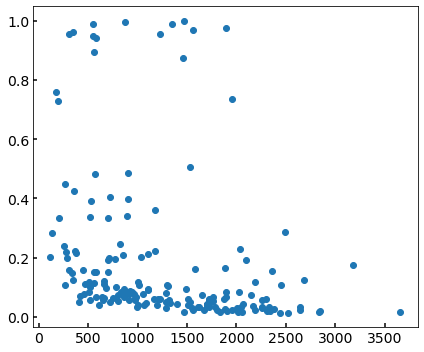

In [6]:
from scipy.stats import pearsonr
features1= features.transpose()
fig, ax = plt.subplots(figsize=(6,5))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
x = features1[3]
y = features1[5]

ax.scatter(x, y)
corr, _ = pearsonr(x, y)
print('Pearsons correlation:', corr)

# Save
plt.tight_layout()
plt.savefig('CorrMap35.png', dpi=300)
plt.show()

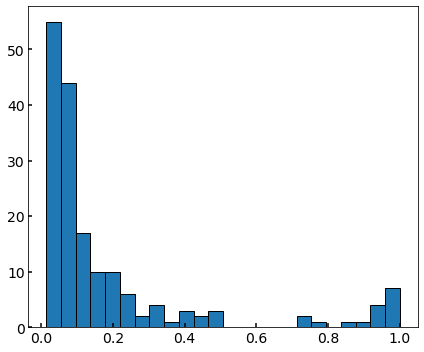

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
plt.hist(features1[5], edgecolor='black', bins=int(120/5))

# Save
plt.tight_layout()
plt.savefig('CorrMap55.png', dpi=300)
plt.show()

In [8]:
# Neural net
clf = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', 
                   alpha=0.05, learning_rate = 'adaptive', solver='adam')

# Train the model on training data
clf.fit(train_features, train_labels);

/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Instantiate model with 1000 decision trees
clf = DecisionTreeRegressor(max_depth=4, min_samples_split=3)
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [10]:
# Instantiate model with 1000 decision trees
clf = linear_model.BayesianRidge()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [11]:
# Instantiate model with 1000 decision trees
clf = linear_model.LinearRegression()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [20]:
# Instantiate model with 1000 decision trees
clf = XGBRegressor(max_depth=4, n_estimators=45, gamma=0.07, 
                   learning_rate = 0.118, subsample=0.725, min_child_weight = 2, 
                  random_state=0)
# clf = linear_model.BayesianRidge()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('Doneskies')

Doneskies


In [13]:
# Instantiate model with 1000 decision trees
clf = RandomForestRegressor(max_depth=4, n_estimators=1000, min_samples_split=3)
# clf = linear_model.BayesianRidge()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [18]:
test_labels = np.asfarray(test_labels)

# Use the forest's predict method on the test data
predictions = clf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

train_labels = np.asfarray(train_labels)

# Use the forest's predict method on the test data
pred_train = clf.predict(train_features)
# Calculate the absolute errors
errors = abs(pred_train - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

Mean Absolute Error: 9.7885 units.
Mean Absolute Error: 4.0733 units.


Doneskies
Mean Absolute Error: 9.3837 units.
Mean Absolute Error: 3.789 units.


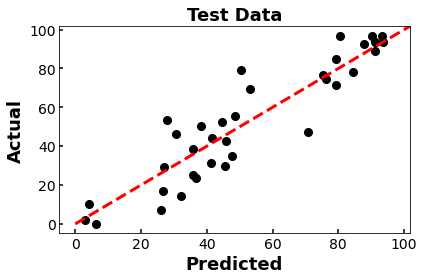

r2 score =  0.8449215062006744
RMSE =  11.919616172324309
MAE =  9.383687099257202
r2 score =  0.9672867337695347
Doneskies
Mean Absolute Error: 9.7885 units.
Mean Absolute Error: 4.0733 units.


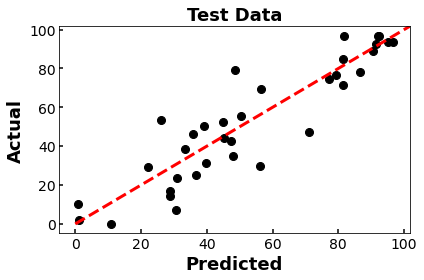

r2 score =  0.8269692671126158
RMSE =  12.590648720440573
MAE =  9.788470072868126
r2 score =  0.96253477591564
Doneskies
Mean Absolute Error: 9.687 units.
Mean Absolute Error: 3.9143 units.


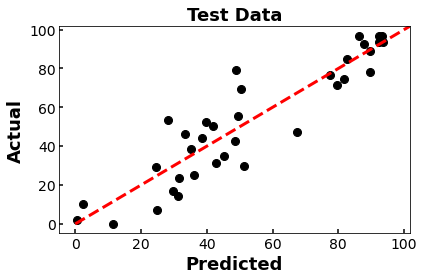

r2 score =  0.8408441514878051
RMSE =  12.075295984089168
MAE =  9.686971851032952
r2 score =  0.9651368576881205
Doneskies
Mean Absolute Error: 9.5318 units.
Mean Absolute Error: 3.9301 units.


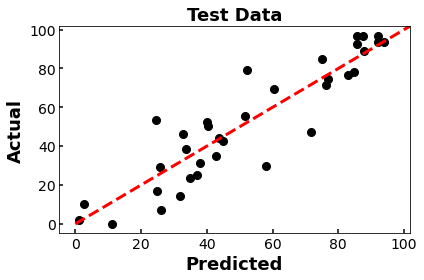

r2 score =  0.8354210593540073
RMSE =  12.279300141503104
MAE =  9.531760845477947
r2 score =  0.9662970272153159
Doneskies
Mean Absolute Error: 10.0355 units.
Mean Absolute Error: 4.1052 units.


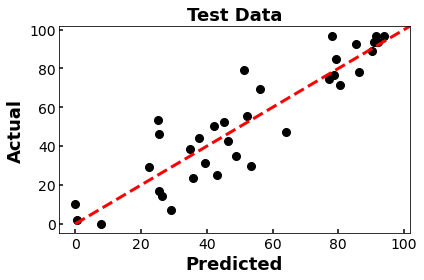

r2 score =  0.82786752931152
RMSE =  12.557924995634385
MAE =  10.035456177293383
r2 score =  0.9628470807392574
Doneskies
Mean Absolute Error: 9.5888 units.
Mean Absolute Error: 3.8257 units.


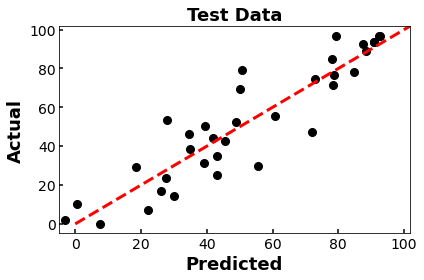

r2 score =  0.8357294052193847
RMSE =  12.267791844897381
MAE =  9.58881097370479
r2 score =  0.9662704779618198
Doneskies
Mean Absolute Error: 9.8587 units.
Mean Absolute Error: 3.9948 units.


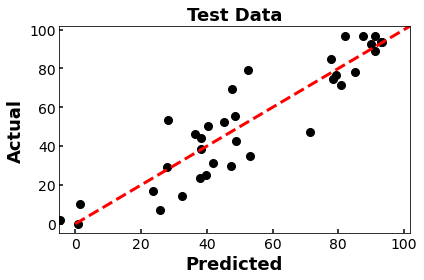

r2 score =  0.8346911396061188
RMSE =  12.306499817901841
MAE =  9.858674176377038
r2 score =  0.9627667099736573
Doneskies
Mean Absolute Error: 9.478 units.
Mean Absolute Error: 4.0512 units.


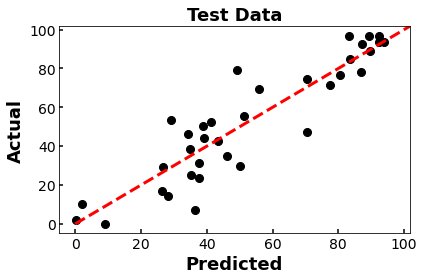

r2 score =  0.8359569324310628
RMSE =  12.259292990702047
MAE =  9.477952045397554
r2 score =  0.961788125241886
Doneskies
Mean Absolute Error: 9.5105 units.
Mean Absolute Error: 3.6794 units.


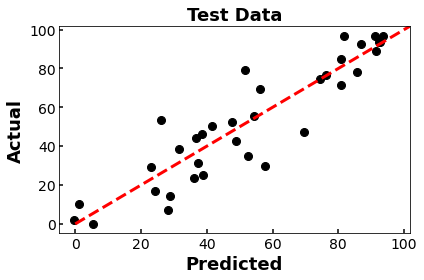

r2 score =  0.8357043561692928
RMSE =  12.268727145640337
MAE =  9.510499003190546
r2 score =  0.9683085750995108
Doneskies
Mean Absolute Error: 9.7371 units.
Mean Absolute Error: 4.2761 units.


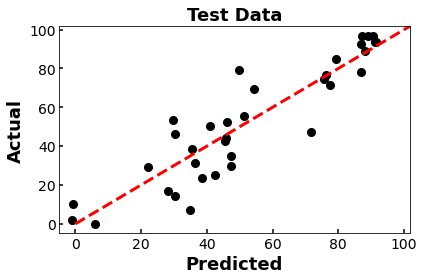

r2 score =  0.8314935484552699
RMSE =  12.42495287498073
MAE =  9.737085496206095
r2 score =  0.9592869432236781
Doneskies
Mean Absolute Error: 9.9597 units.
Mean Absolute Error: 3.953 units.


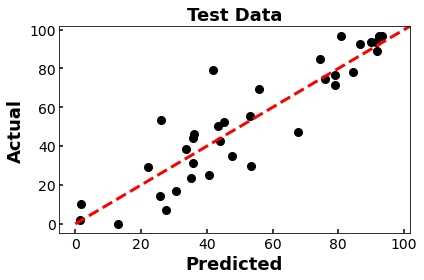

r2 score =  0.8211716103582937
RMSE =  12.799845174165752
MAE =  9.959730789617963
r2 score =  0.9645563617478792
Doneskies
Mean Absolute Error: 9.1778 units.
Mean Absolute Error: 4.0657 units.


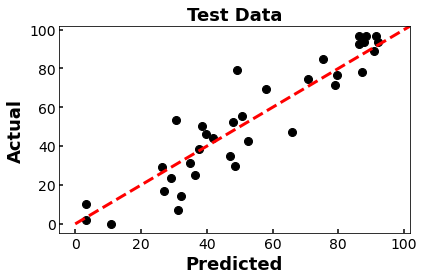

r2 score =  0.8566977988009105
RMSE =  11.458108076918473
MAE =  9.17784024806039
r2 score =  0.9635697126359382
Doneskies
Mean Absolute Error: 10.0081 units.
Mean Absolute Error: 3.9304 units.


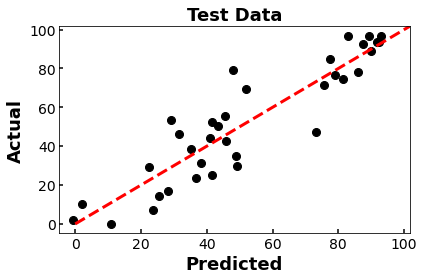

r2 score =  0.8337581672897294
RMSE =  12.341178749007655
MAE =  10.008081234479782
r2 score =  0.9660258654372654
Doneskies
Mean Absolute Error: 9.5119 units.
Mean Absolute Error: 4.2216 units.


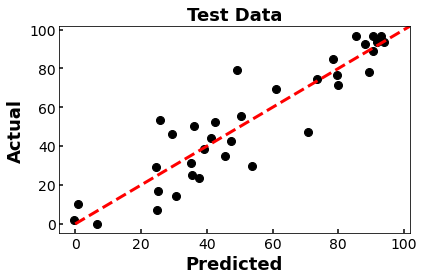

r2 score =  0.837272201916482
RMSE =  12.210047616090876
MAE =  9.51192117269191
r2 score =  0.9602164774412222
Doneskies
Mean Absolute Error: 9.3446 units.
Mean Absolute Error: 4.2606 units.


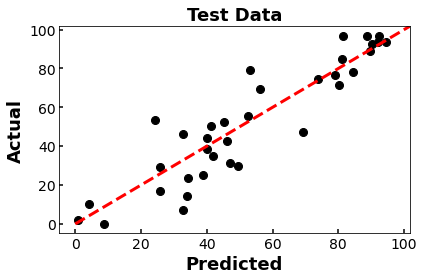

r2 score =  0.8378201542328696
RMSE =  12.189472871959845
MAE =  9.34459595871464
r2 score =  0.9595812077946781
Doneskies
Mean Absolute Error: 9.7565 units.
Mean Absolute Error: 4.0334 units.


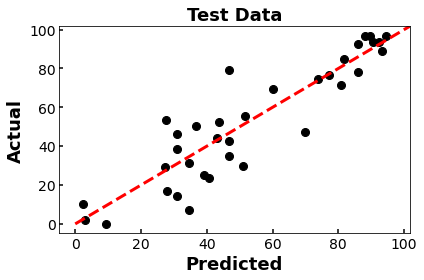

r2 score =  0.8238861231480322
RMSE =  12.702326521101119
MAE =  9.756525899567086
r2 score =  0.9641468453109167
Doneskies
Mean Absolute Error: 9.3736 units.
Mean Absolute Error: 4.0661 units.


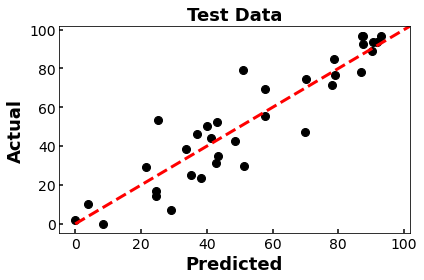

r2 score =  0.8506207939630481
RMSE =  11.698537108999066
MAE =  9.373623143715415
r2 score =  0.9627711466293928
Doneskies
Mean Absolute Error: 9.6718 units.
Mean Absolute Error: 3.9364 units.


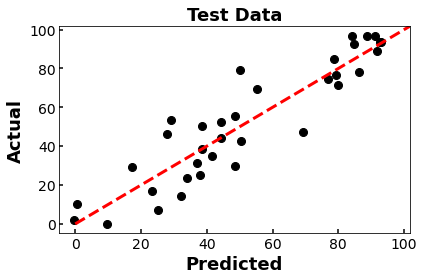

r2 score =  0.8443240910045972
RMSE =  11.942553314495726
MAE =  9.671764849054302
r2 score =  0.9647526343229801
Doneskies
Mean Absolute Error: 9.4646 units.
Mean Absolute Error: 4.1692 units.


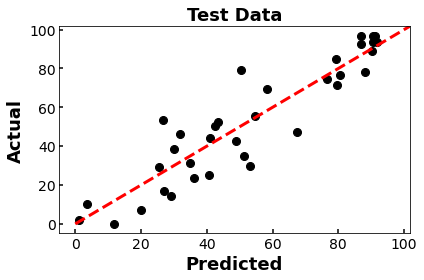

r2 score =  0.8484677674647487
RMSE =  11.782541945615128
MAE =  9.464550564245647
r2 score =  0.9612611028734371
Doneskies
Mean Absolute Error: 9.9906 units.
Mean Absolute Error: 4.2343 units.


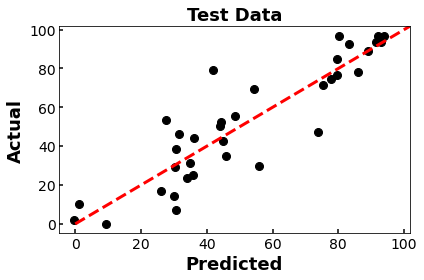

r2 score =  0.8096786043392061
RMSE =  13.204753260133316
MAE =  9.990584267968504
r2 score =  0.9597467275151592
Doneskies
Mean Absolute Error: 9.765 units.
Mean Absolute Error: 4.0189 units.


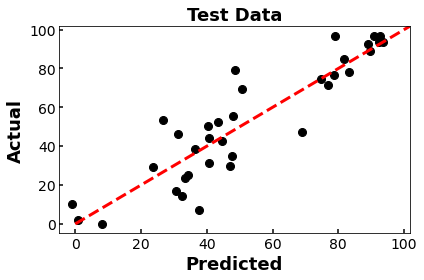

r2 score =  0.819611516044306
RMSE =  12.855556693107685
MAE =  9.76498222108311
r2 score =  0.9623771111091133
Doneskies
Mean Absolute Error: 9.9409 units.
Mean Absolute Error: 3.991 units.


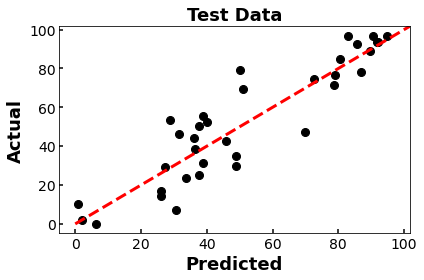

r2 score =  0.8305216583741968
RMSE =  12.460732888816828
MAE =  9.940857832035608
r2 score =  0.9641197883024433
Doneskies
Mean Absolute Error: 10.2326 units.
Mean Absolute Error: 3.9167 units.


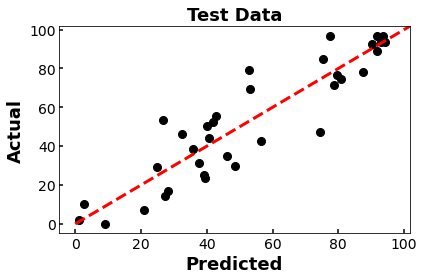

r2 score =  0.8294329130409734
RMSE =  12.50069329356194
MAE =  10.232628593481966
r2 score =  0.9650800650814559
Doneskies
Mean Absolute Error: 9.6511 units.
Mean Absolute Error: 3.9815 units.


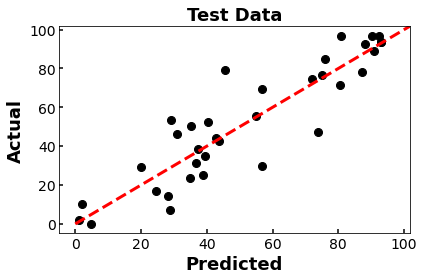

r2 score =  0.8198275301964909
RMSE =  12.84785716048751
MAE =  9.651139338614152
r2 score =  0.9648824637475643
Doneskies
Mean Absolute Error: 8.5478 units.
Mean Absolute Error: 3.9387 units.


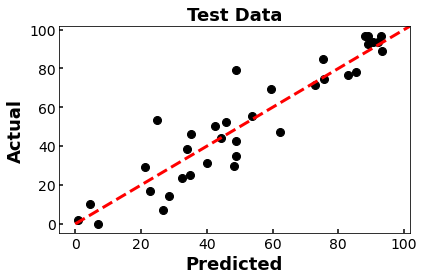

r2 score =  0.8675735083766436
RMSE =  11.014731634058124
MAE =  8.547828688918676
r2 score =  0.964630479896394
Doneskies
Mean Absolute Error: 8.9789 units.
Mean Absolute Error: 3.9651 units.


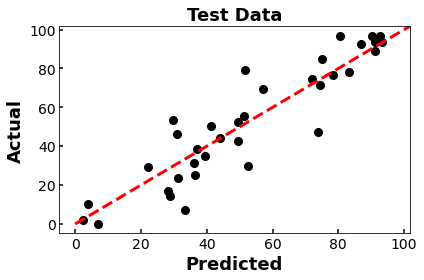

r2 score =  0.84426747274414
RMSE =  11.944724829440892
MAE =  8.978914391878837
r2 score =  0.964519167259334
Doneskies
Mean Absolute Error: 9.6596 units.
Mean Absolute Error: 4.1266 units.


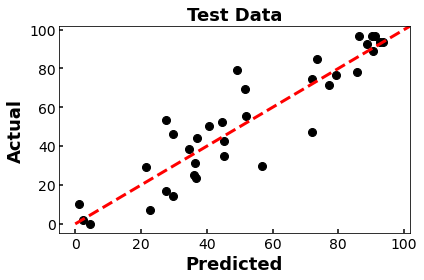

r2 score =  0.8336940671490637
RMSE =  12.343557798370696
MAE =  9.65962972467187
r2 score =  0.9610955178486152
Doneskies
Mean Absolute Error: 10.7406 units.
Mean Absolute Error: 3.6721 units.


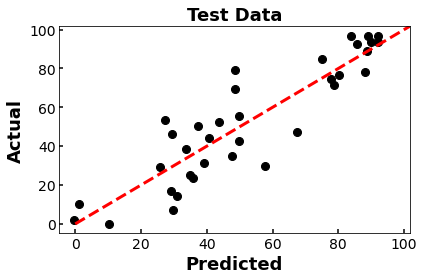

r2 score =  0.8107714973510926
RMSE =  13.166785485307221
MAE =  10.740572423126176
r2 score =  0.9676751755392057
Doneskies
Mean Absolute Error: 9.6809 units.
Mean Absolute Error: 4.1719 units.


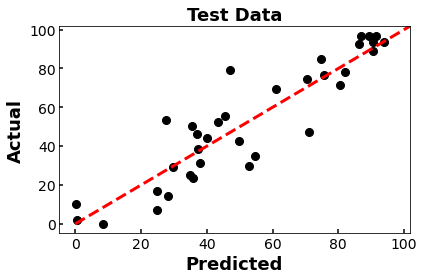

r2 score =  0.8351643674874327
RMSE =  12.288872351609731
MAE =  9.680946159908773
r2 score =  0.9610389464204614
Doneskies
Mean Absolute Error: 9.1264 units.
Mean Absolute Error: 3.9591 units.


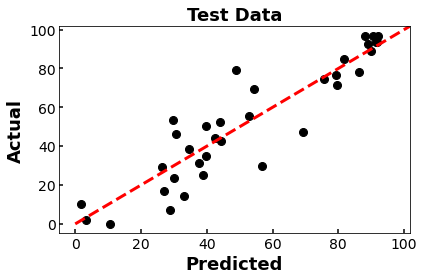

r2 score =  0.8407684599255337
RMSE =  12.078167035898405
MAE =  9.126368072951223
r2 score =  0.9659354041181383
Doneskies
Mean Absolute Error: 9.2807 units.
Mean Absolute Error: 3.9341 units.


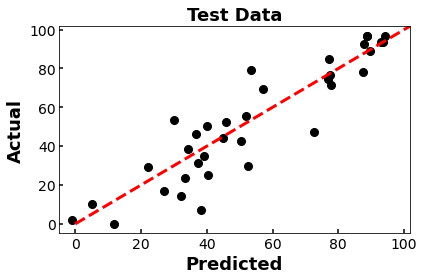

r2 score =  0.837534011803476
RMSE =  12.200221396960904
MAE =  9.280696290181206
r2 score =  0.965591816217623
Doneskies
Mean Absolute Error: 10.3591 units.
Mean Absolute Error: 4.0664 units.


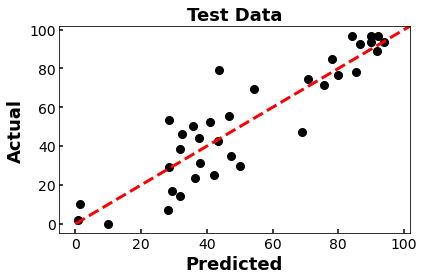

r2 score =  0.8174112779776602
RMSE =  12.933720099535952
MAE =  10.359087715173926
r2 score =  0.9600813095874883
Doneskies
Mean Absolute Error: 9.4243 units.
Mean Absolute Error: 4.1175 units.


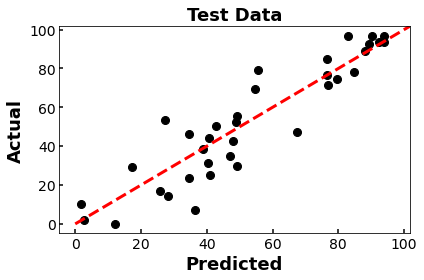

r2 score =  0.8424644724738329
RMSE =  12.01367113832957
MAE =  9.424309247951745
r2 score =  0.9622771557427243
Doneskies
Mean Absolute Error: 10.1389 units.
Mean Absolute Error: 4.009 units.


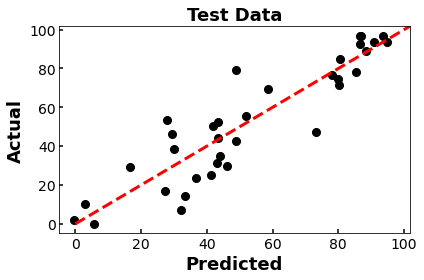

r2 score =  0.8252112879930831
RMSE =  12.65444710119985
MAE =  10.138908969968412
r2 score =  0.964493805880331
Doneskies
Mean Absolute Error: 10.3912 units.
Mean Absolute Error: 4.337 units.


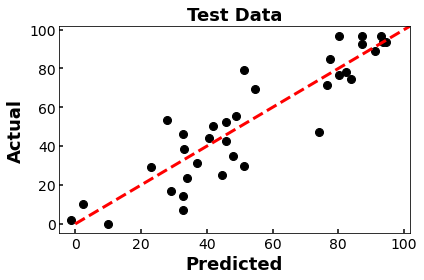

r2 score =  0.8166563340097364
RMSE =  12.960430845156768
MAE =  10.391218843918411
r2 score =  0.9587227567466615
Doneskies
Mean Absolute Error: 9.8355 units.
Mean Absolute Error: 4.1253 units.


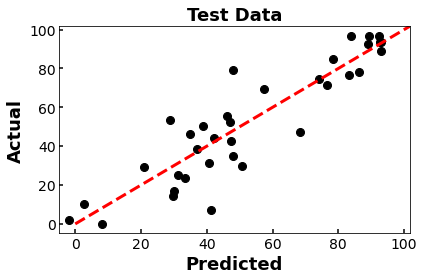

r2 score =  0.8251315620852365
RMSE =  12.65733279173679
MAE =  9.835507797458101
r2 score =  0.9629225991599719
Doneskies
Mean Absolute Error: 11.1062 units.
Mean Absolute Error: 3.8073 units.


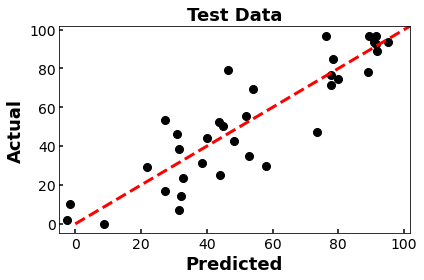

r2 score =  0.7878235416174773
RMSE =  13.94232113305209
MAE =  11.10622041161028
r2 score =  0.9667261381755662
Doneskies
Mean Absolute Error: 9.414 units.
Mean Absolute Error: 4.2554 units.


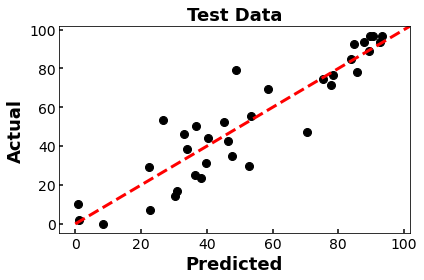

r2 score =  0.8420659275193829
RMSE =  12.028858073192
MAE =  9.414034195584039
r2 score =  0.9579742979380055
Doneskies
Mean Absolute Error: 9.6449 units.
Mean Absolute Error: 4.0637 units.


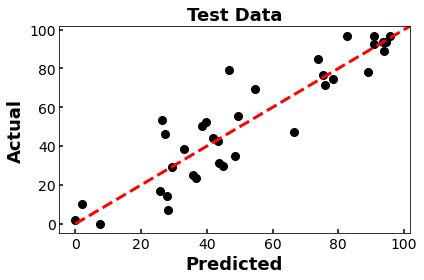

r2 score =  0.8336855334651403
RMSE =  12.343874487822745
MAE =  9.644936570870417
r2 score =  0.9631438130679543
Doneskies
Mean Absolute Error: 10.0307 units.
Mean Absolute Error: 3.9561 units.


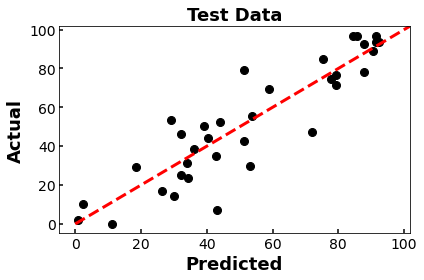

r2 score =  0.8173678357225868
RMSE =  12.93525862980432
MAE =  10.030697867826886
r2 score =  0.9653782106406692
Doneskies
Mean Absolute Error: 9.7625 units.
Mean Absolute Error: 4.1184 units.


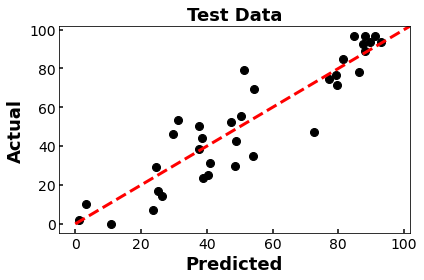

r2 score =  0.8416718415161415
RMSE =  12.043856265411238
MAE =  9.762509367679007
r2 score =  0.962639403579094
Doneskies
Mean Absolute Error: 9.1856 units.
Mean Absolute Error: 3.982 units.


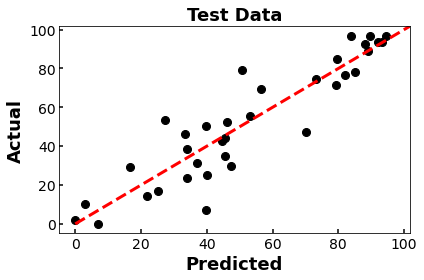

r2 score =  0.8390232448518756
RMSE =  12.144176432765793
MAE =  9.185582888202632
r2 score =  0.9658534593265825
Doneskies
Mean Absolute Error: 9.6818 units.
Mean Absolute Error: 3.7825 units.


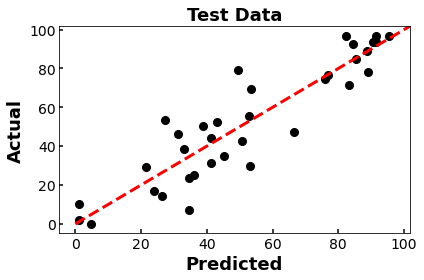

r2 score =  0.8313481026278313
RMSE =  12.43031399837631
MAE =  9.681827135086843
r2 score =  0.9650526896050481
Doneskies
Mean Absolute Error: 9.5909 units.
Mean Absolute Error: 4.0172 units.


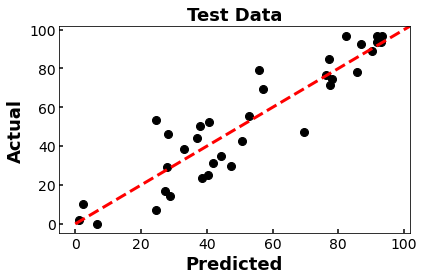

r2 score =  0.846469781546247
RMSE =  11.859965278003944
MAE =  9.59090245375985
r2 score =  0.9630117648326856
Doneskies
Mean Absolute Error: 10.3587 units.
Mean Absolute Error: 4.0575 units.


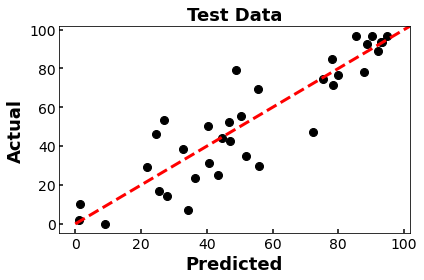

r2 score =  0.8038885894271065
RMSE =  13.404107906364397
MAE =  10.358725032085875
r2 score =  0.9643456092086872
Doneskies
Mean Absolute Error: 10.1668 units.
Mean Absolute Error: 3.9792 units.


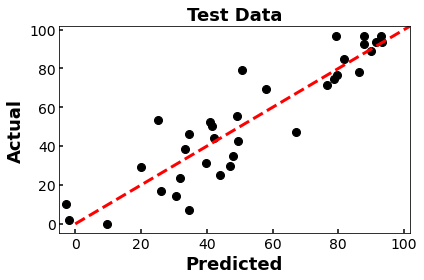

r2 score =  0.8262874099190332
RMSE =  12.61543213085888
MAE =  10.166776334514768
r2 score =  0.9631530154706562
Doneskies
Mean Absolute Error: 10.0449 units.
Mean Absolute Error: 3.8519 units.


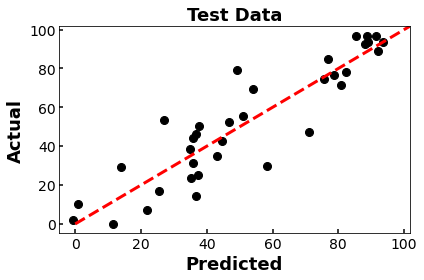

r2 score =  0.8237293643890387
RMSE =  12.707978426797128
MAE =  10.04486355027895
r2 score =  0.9663737089077837
Doneskies
Mean Absolute Error: 9.2142 units.
Mean Absolute Error: 4.2564 units.


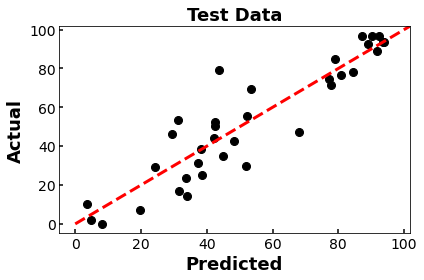

r2 score =  0.8430715280854616
RMSE =  11.990501743021962
MAE =  9.21423509288949
r2 score =  0.9593155398370288
Doneskies
Mean Absolute Error: 9.463 units.
Mean Absolute Error: 4.0213 units.


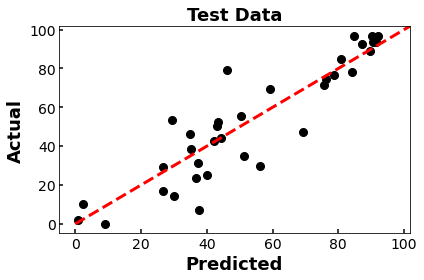

r2 score =  0.8228917090144221
RMSE =  12.738137420500673
MAE =  9.462996739535368
r2 score =  0.9630818395018695
Doneskies
Mean Absolute Error: 9.5799 units.
Mean Absolute Error: 4.0645 units.


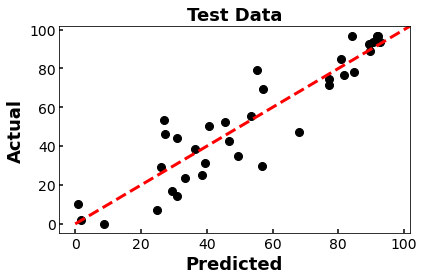

r2 score =  0.8412874233076173
RMSE =  12.058468545321201
MAE =  9.579885705155116
r2 score =  0.9648769301659076


<AxesSubplot:ylabel='Count'>

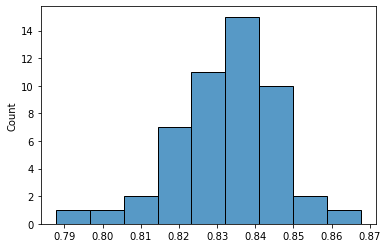

In [14]:
r_squareds = []
for i in range (0, 50):
 # Instantiate model with 1000 decision trees
 clf = XGBRegressor(max_depth=4, n_estimators=45, gamma=0.07, 
                   learning_rate = 0.118, subsample=0.725, min_child_weight = 2, 
                  random_state=i)
 # clf = linear_model.BayesianRidge()
 # clf = XGBRegressor()
 # Train the model on training data
 clf.fit(train_features, train_labels);
 print('Doneskies')
 
 test_labels = np.asfarray(test_labels)

 # Use the forest's predict method on the test data
 predictions = clf.predict(test_features)
 # Calculate the absolute errors
 errors = abs(predictions - test_labels)
 # Print out the mean absolute error (mae)
 print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

 train_labels = np.asfarray(train_labels)

 # Use the forest's predict method on the test data
 pred_train = clf.predict(train_features)
 # Calculate the absolute errors
 errors = abs(pred_train - train_labels)
 # Print out the mean absolute error (mae)
 print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')
 # Plot predictions vs actual values
 # Plot style
 fig, ax = plt.subplots(figsize=(6,4))
 ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
 # ax.set_xlim(20,105)
 # ax.set_ylim(20,105)

 # Predicted 2D/G
 plt.plot(predictions, test_labels, linestyle = 'none', marker = 'o', color='black', markersize='8')
 plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
 plt.xlabel('Predicted', fontsize='18', fontname='Arial', fontweight='bold')
 plt.ylabel('Actual', fontsize='18', fontname='Arial', fontweight='bold')
 ymin, ymax = plt.ylim()
 plt.xlim(ymin, ymax)
 plt.ylim(ymin, ymax)
 # Make a red line to show perfect predictions
 x2 = np.arange(0, ymax*1.1, .1)
 y2 = np.arange(0, ymax*1.1, .1)
 plt.plot(x2,y2, linestyle='--', linewidth = '3', color='red')

 # Save
 plt.tight_layout()
 # plt.savefig('TestData2DtoG_RF.png', dpi=300)
 plt.show()

 y_pred = predictions
 y_true = test_labels

 r_squared = r2_score(test_labels, predictions)
 r_squareds.append(r_squared)
 print('r2 score = ', r_squared)
 rmse = math.sqrt(mean_squared_error(test_labels, predictions))
 print('RMSE = ', rmse)
 mae = mean_absolute_error(test_labels, predictions)
 print('MAE = ', mae)
 # corr, _ = pearsonr(test_labels, predictions)
 # print('Pearsons correlation: %.3f' % corr)
 # acc = accuracy_func(predictions, test_labels)
 # print('Accuracy: %.3f' % acc)


 r_squared = r2_score(train_labels, pred_train)
 print('r2 score = ', r_squared)

sns.histplot(r_squareds)

In [33]:
df1['Material']

0       CB
1       CB
2       CB
3       CB
4       CB
      ... 
169    TCB
170    TCB
171    TCB
172    TCB
173    TCB
Name: Material, Length: 173, dtype: object

Average of r_squared for test 0.7501332044587391
std of r_squared for test 0.01954312304363079 

Average of r_squared for train 0.9659955796919408
std of r_squared for train 0.0027653260368587025
Mean Absolute Error: 4.3058 units.
r2 score =  0.9610356050857538
time is:  1.3951096534729004
Mean Absolute Error for test: 10.6327 units.
r2 score =  0.7675210226374499
****
Average of r_squared for test 0.7904631979959827
std of r_squared for test 0.009095516772534994 

Average of r_squared for train 0.9636448441466928
std of r_squared for train 0.002784297152137106
Mean Absolute Error: 4.0095 units.
r2 score =  0.964999161634142
time is:  2.9462125301361084
Mean Absolute Error for test: 11.8878 units.
r2 score =  0.8042893622369187
****
Average of r_squared for test 0.8159737508439651
std of r_squared for test 0.012552805201172409 

Average of r_squared for train 0.9622662575214301
std of r_squared for train 0.0028734127099766466
Mean Absolute Error: 4.0792 units.
r2 score =  0.96168718385

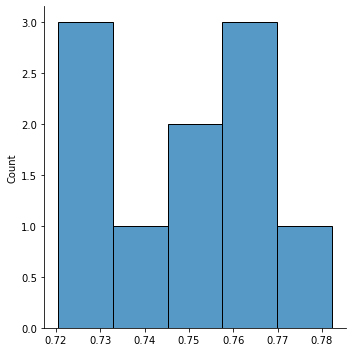

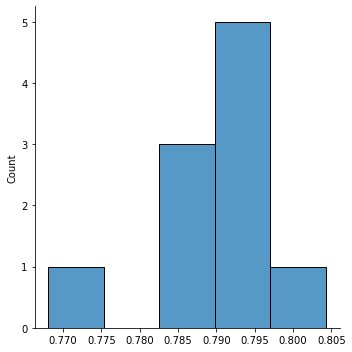

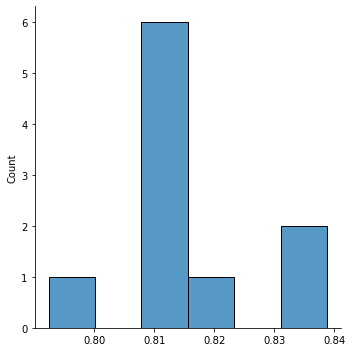

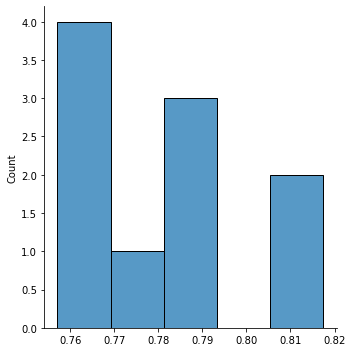

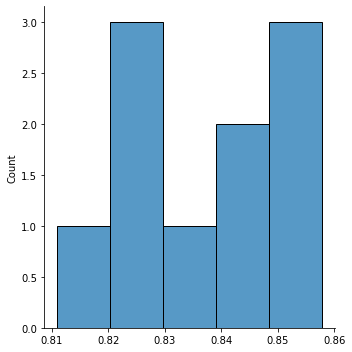

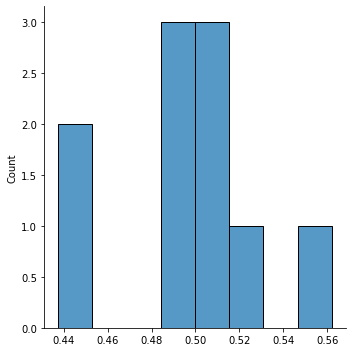

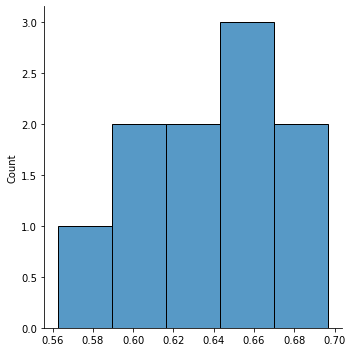

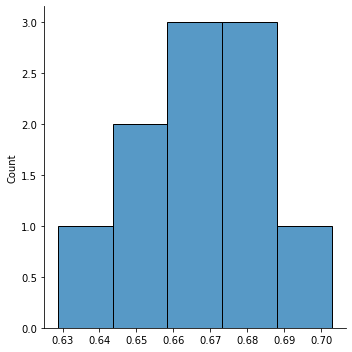

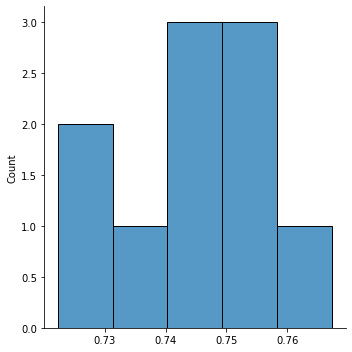

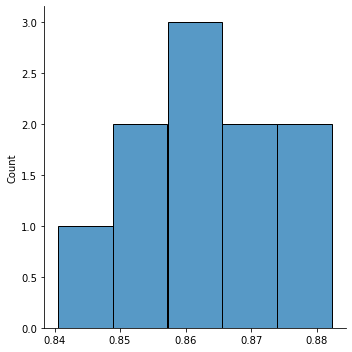

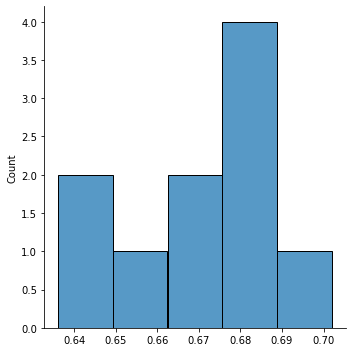

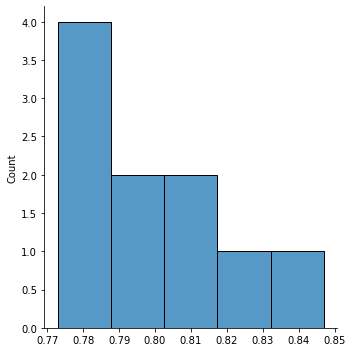

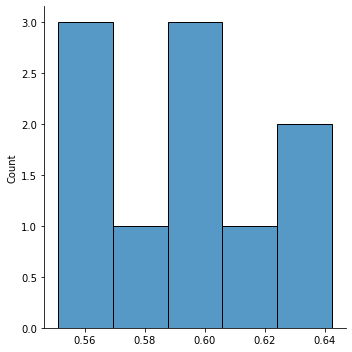

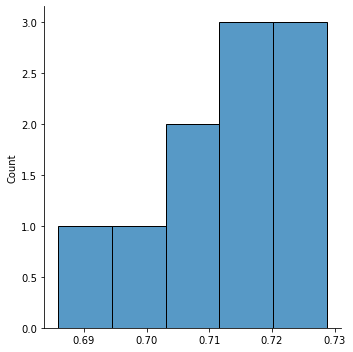

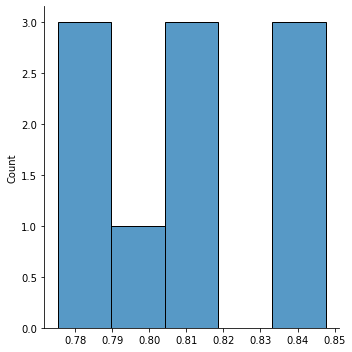

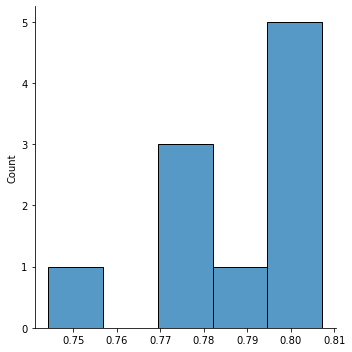

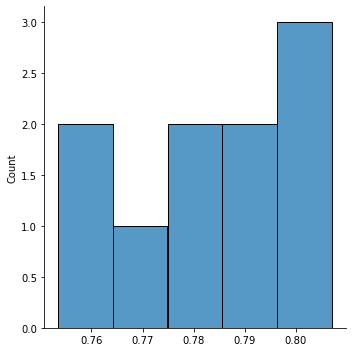

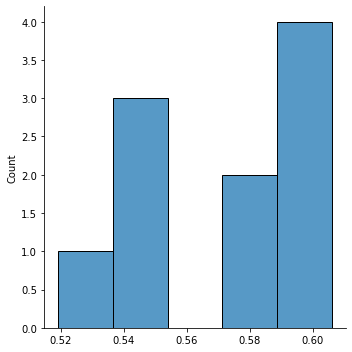

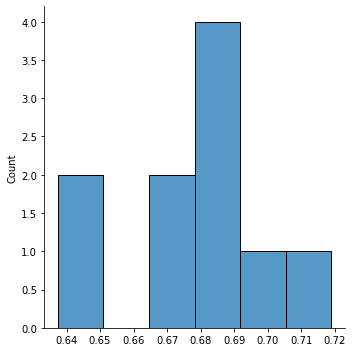

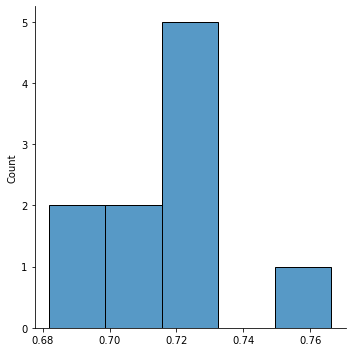

In [41]:
import time 
r_squareds = list()
r_squareds_randomized_testtrain = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
r2_max = 0
for rand in range (0, 20):
    indices = np.arange(len(features))
    train_features, test_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(features, labels, 
                      indices, test_size = 0.15, random_state=rand, stratify=df1['Material'])
    r_squareds = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    for random_state in range(10):
        # Instantiate model with 1000 decision trees
        xgbr_graphyield =  XGBRegressor(max_depth=4, n_estimators=45, gamma=0.07, 
                   learning_rate = 0.118, subsample=0.725, min_child_weight = 2, 
                  random_state=random_state)
        #xgbr_graphyield = RandomForestRegressor(max_depth=20, n_estimators=500, min_samples_split=3)
        """
        xgbr_graphyield = MLPRegressor(hidden_layer_sizes=(500, 500, 500), activation='logistic', batch_size=2,
                   alpha=0.00001, learning_rate = 'adaptive', solver='adam', random_state=random_state)    
        """
        # Train the model on training data
        xgbr_graphyield.fit(train_features, train_labels);
        # Use the forest's predict method on the test data
        predictions = xgbr_graphyield.predict(test_features)
        # Calculate the absolute errors
        errors = abs(predictions - test_labels)
        MAEs.append(errors)
        # Print out the mean absolute error (mae)
        #print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

        r_squared = r2_score(test_labels, predictions)
        r_squareds.append (r_squared)
    
        pred_train = xgbr_graphyield.predict(train_features)
        errors = abs(pred_train - train_labels)
        MAEs_train.append(errors)
        r_squared = r2_score(train_labels, pred_train)
        r_squareds_train.append(r_squared)
        #print('r2 score = ', r_squared)

    print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
    print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

    print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
    print ('std of r_squared for train', np.std(np.array(r_squareds_train)))
    # train accuracy
    pred_train = xgbr_graphyield.predict(train_features)
    # Calculate the absolute errors
    errors_train = abs(pred_train - train_labels)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors_train), 4), 'units.')
    r_squared_train = r2_score(train_labels, pred_train)
    print('r2 score = ', r_squared_train)
    end = time.time()
    print ('time is: ', end-start)

    pred_test = xgbr_graphyield.predict(test_features)
    # Calculate the absolute errors
    errors_test = abs(pred_test - test_labels)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error for test:', round(np.mean(errors_test), 4), 'units.')
    r_squared_test = r2_score(test_labels, pred_test)
    if r_squared_test>r2_max:
        r2_max = r_squared_test
        rand_split = rand
    print('r2 score = ', r_squared_test)
    print ('****')

    sns.displot(r_squareds)
    r_squareds_randomized_testtrain.append (r_squareds)


r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
np.mean (r_squareds_randomized_testtrain_vec)

r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
r_squareds_randomized_testtrain_mean = np.mean (r_squareds_randomized_testtrain_vec, axis=1)
print (r_squareds_randomized_testtrain_mean)
print (np.mean(r_squareds_randomized_testtrain_mean))
print (np.mean(r_squareds_randomized_testtrain_vec))

In [43]:
print (np.mean(r_squareds_randomized_testtrain_vec))

0.7255604567288626


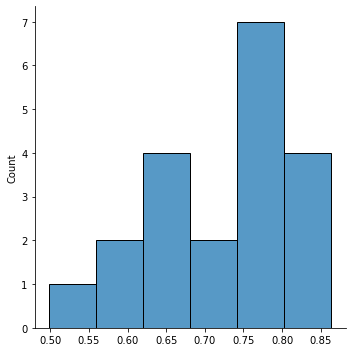

In [44]:
sns.displot (r_squareds_randomized_testtrain_mean)
plt.savefig('r_squareddist_jacob_model2_mean70.png', dpi=200)

#### Performance on test data
train_predictions = clf.predict(train_features)

# Plot style
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
# ax.set_xlim(20,105)
# ax.set_ylim(20,105)

# Predicted 2D/G
plt.plot(train_predictions, train_labels, linestyle = 'none', marker = 'o', color='black', markersize='8')
plt.title('Training Data', fontsize='18', fontname='Arial', fontweight='bold')
plt.xlabel('Predicted', fontsize='18', fontname='Arial', fontweight='bold')
plt.ylabel('Actual', fontsize='18', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(0, ymax*1.1, .1)
y2 = np.arange(0, ymax*1.1, .1)
plt.plot(x2,y2, linestyle='--', linewidth = '3', color='red')

# Save
plt.tight_layout()
# plt.savefig('TrainingData2DtoG_RF.png', dpi=300)
plt.show()

r_squared = r2_score(train_labels, train_predictions)
print('r2 score = ', r_squared)
mae = mean_absolute_error(train_labels, train_predictions)
print('MAE = ', mae)
# corr, _ = pearsonr(train_labels, train_predictions)
# print('Pearsons correlation: %.3f' % corr)
# acc = accuracy_func(train_predictions, train_labels)
# print('Accuracy: %.3f' % acc)

In [ ]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
        estimator=XGBRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (45,50,51,52),
            'min_child_weight': range(2,5),
            'learning_rate': np.linspace(0.07, 0.13, 6),
            'subsample': np.linspace(0.7, 0.8, 5),
            'gamma': np.linspace(0.07, 0.13, 6)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('Max Depth: ', best_params["max_depth"])
print('N Estimators: ', best_params["n_estimators"])
print('Min Child Weight: ', best_params["min_child_weight"])
print('Learning Rate: ', best_params["learning_rate"])
print('Subsample: ', best_params["subsample"])
print('Gamma: ', best_params["gamma"])

In [ ]:
# Random forest
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'min_samples_split': range(2,5),
            'n_estimators': (200, 500, 1000)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('Max Depth: ', best_params["max_depth"])
print('Min samples split: ', best_params["min_samples_split"])
print('N Estimators: ', best_params["n_estimators"])

In [ ]:
# Decision tree
gsc = GridSearchCV(
        estimator=DecisionTreeRegressor(),
        param_grid={
            'max_depth': range(3,7), 
            'min_samples_split': range(2,4)
            # 'learning_rate': (0.0001, 0.001, 0.01, 0.1, 0.2), 
            # 'n_estimators': (100, 200, 300, 400, 500)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('Max depth: ', best_params["max_depth"])
print('Min samples split: ', best_params["min_samples_split"])

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Plot style
fig, ax = plt.subplots(figsize=(5,4))
# ax.set_yticks(np.arange(.2, 2.2, .2))
# ax.set_xticks(np.arange(0, 1200, 100))
# ax.set_xlim(.7,3.3)

# Import file
filename='FJH_ML_Final.csv'
df = import_file_noOneHot(filename)
# Create normalized I by category
norm1, norm2 = category_normalization_theonesyoualwaysuse(df)
df['Norm_I_Max'] = norm1
df['Norm_charge_tot'] = norm2
df['charge_density'] = df['Voltage']*df['Cap']/df['Mass']
# df['test_feature'] = (df['Voltage']/df['Mass'])#*df['PulseTime']
# df = df[df['TwoDtoG']<1.5]
# df = df[df['Graphene_Yield']>20]

# Cut dataframe to only the test set
df = df.iloc[idx2]
df['y_pred'] = y_pred
df['y_true'] = y_true

groups = df.groupby(['Material'])

# Plot
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
counter=0
markers = ['o', 's', '^', 'v']
colors=['blue', 'red', 'green', 'orange']
colors2 = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']
for name, group in groups:
    ax.plot(group.y_pred, group.y_true, marker=markers[counter], alpha=0.9, linestyle='', ms=8, label=name)
    counter+=1
    # Predicted 2D/G
# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('Predicted Yield (%)', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Actual Yield (%)', fontsize='18', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
ax.set_xlim(ymin, ymax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '3', color='red')
leg = plt.legend(frameon="True", prop={'family': 'Arial'})
ax.legend(frameon=False, ncol=2, fontsize=12, loc='upper left')

# Plot
# plt.plot(df['I_Max'],df['Graphene_Yield'], linestyle = 'none', marker = 'o', color='black', markersize='8')
# plt.xlabel('Flash Voltage (V)', fontsize='18', fontname='Arial', fontweight='bold')
# plt.ylabel('D/G Ratio', fontsize='18', fontname='Arial', fontweight='bold')

# Save
plt.tight_layout()
plt.savefig('XGBPerformanceJune25.png', dpi=300)
plt.show()

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
for name, group in groups:
    p = ax.scatter(group.y_pred, group.y_true, c=group.charge_density, marker='o', s=100, cmap='Blues')
    
cb = fig.colorbar(p, ax=ax)
cb.set_label('Charge Density (C/g)', fontsize='18', fontname='Arial', fontweight='bold')
cb.ax.tick_params(labelsize=14)

# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('Predicted Yield', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Actual Yield', fontsize='18', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
ax.set_xlim(ymin, ymax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '3', color='red')
# ax.legend(fontsize=12)

# Plot
# plt.plot(df['I_Max'],df['Graphene_Yield'], linestyle = 'none', marker = 'o', color='black', markersize='8')
# plt.xlabel('Flash Voltage (V)', fontsize='18', fontname='Arial', fontweight='bold')
# plt.ylabel('D/G Ratio', fontsize='18', fontname='Arial', fontweight='bold')

# Save
plt.tight_layout()
# plt.savefig('XGB_Regression_Performance_colorChargeDensity.png', dpi=300)
plt.show()

In [ ]:
# Train neural network
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
        estimator=MLPRegressor(),
        param_grid={'hidden_layer_sizes': [(100, 100, 100), (10,10,10), (50,50,50), (200, 200, 200)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.05, 0.10, 0.12, 0.15],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam'],
          'n_iter_no_change': range(3,7)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('hidden layer: ', best_params["hidden_layer_sizes"])
print('activation: ', best_params["activation"])
print('learning_rate: ', best_params["learning_rate"])
print('solver ', best_params["solver"])
print('alpha ', best_params["alpha"])
print('N_iter_no_change ', best_params["n_iter_no_change"])

In [ ]:
#M2 Multilayer Perceptron
model = 'M2 MLP'
print(model)
def build_mlp(units = 20, optimizer = 'rmsprop'):
    mlp = Sequential()
    mlp.add(Dense(units = units, activation = 'relu', input_dim = features.shape[1]))
    mlp.add(Dense(units = units, activation = 'relu', ))
    mlp.add(Dense(units = 1))
    mlp.compile(optimizer = optimizer, 
                loss='mean_squared_error', 
                metrics = ['mae'])
    return mlp
mlp = KerasRegressor(build_fn = build_mlp, verbose = 0)
grid_param_mlp = {'units': [20, 40, 60],
                    'batch_size': [16, 32, 64, 128],
                    'epochs': [100, 500, 1000],
                    'optimizer': ['rmsprop', 'adam']}
grid_param_mlp = {'units': [20],
                    'batch_size': [ 128],
                    'epochs': [100],
                    'optimizer': ['adam']}
grid_mlp = GridSearchCV(mlp, grid_param_mlp) 
grid_mlp.fit(train_features, train_labels)
y_pred_train_mlp = grid_mlp.predict(train_features)
y_pred_test_mlp = grid_mlp.predict(test_features)
#df_eval_mlp = save_evaluate_draw(y_pred_train_mlp, y_pred_test_mlp, 
#                                grid_param_mlp, grid_mlp.best_params_, 
#                                grid_mlp.best_estimator_, model)

print('Doneskies')


In [ ]:
feature_names = ['CB SM', 'MC SM', 'A$\mathregular{_{IT}}$', 'I$\mathregular{_{Max}}$', 'CD', 'I$\mathregular{_{f}}$/I$\mathregular{_{Max}}$']
pdp = partial_dependence(clf, features, (5,4))
print('Done!')

In [ ]:
# 3,4 then 2,4 then 2,3 then 5,4
# 4 is CD, 3 is Imax, 2 is AIT, 5 is If/Imax

X=pdp[1][0]
Y=pdp[1][1]
Z=pdp[0][0]
X, Y = np.mgrid[0:X:100j, 0:Y:100j]

resultX = ndimage.zoom(X, 10.0)
resultY = ndimage.zoom(Y, 10.0)
resultZ = ndimage.zoom(Z, 10.0)

fig, ax2 = plt.subplots(figsize=(10,8))
ax2 = plt.axes(projection='3d')
ax2.plot_surface(resultX, resultY, resultZ, rstride=1, cstride=1, cmap='Oranges', alpha=0.7, shade=False, antialiased=True)
plt.show()

In [ ]:
X=pdp[1][0]
Y=pdp[1][1]
Z=pdp[0][0]

In [ ]:
X

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(9,7))
ax = plt.axes(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.tick_params(direction='in', length=4, width=1.5, grid_alpha=0, labelsize=16)

# Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')
# Bonus: To get rid of the grid as well:
# ax.grid(False)
ax.tick_params(direction='in', length=4, width=1.5, grid_alpha=0, labelsize=20)

cset = ax.contourf(resultX, resultY, resultZ, zdir='z', offset=np.min(Z), cmap='Greens')
# cset = ax.contourf(X, Y, Z, zdir='x', offset=0, cmap='Oranges')
# cset = ax.contourf(X, Y, Z, zdir='y', offset=165, cmap='Oranges')
# print(Z)

surf = ax.plot_surface(resultX, resultY, resultZ, rstride=1, cstride=1, cmap='Greens', alpha=0.7, shade=False, antialiased=True)
cb = fig.colorbar(surf, shrink=0.5, aspect=8)
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)

ax.set_xlabel('\n\nI$\mathregular{_{F}}$/I$\mathregular{_{Max}}$ (a.u.)', fontfamily='Arial', fontweight='bold', fontsize=28, linespacing=3)
# ax.set_xlabel('\nA$\mathregular{_{IT}}$ (C/g)', fontfamily='Arial', fontweight='bold', fontsize=28)
# ax.set_xlabel('\nI$\mathregular{_{Max}}$ (A/g)', fontfamily='Arial', fontweight='bold', fontsize=28)
ax.set_ylabel('\n\nCD (C/g)', fontfamily='Arial', fontweight='bold', fontsize=28, linespacing=3)
ax.set_zlabel('\nPD (%)', fontfamily='Arial', fontweight='bold', fontsize=28, linespacing=3)
# ax.view_init(30, -150)

ax.set_yticks([0, 30, 60, 90, 120, 150])

plt.savefig('3Dplot4_IfImax_CD_PD.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(len(errors))

print(errors)

In [ ]:
# plot single tree
plot_tree(clf, num_trees=5, rankdir='LR')
plt.savefig('XGBtree.png', dpi=300)
plt.show()

In [ ]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = clf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree2.dot', feature_names = feature_list, rounded = True, precision = 1)

In [ ]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree2.dot')
# Write graph to a png file
graph.write_png('sampleTree.png')

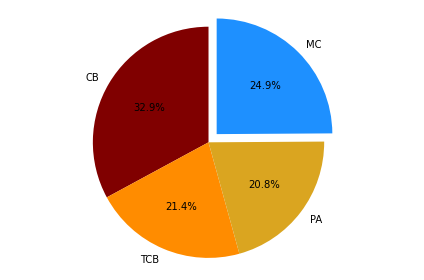

In [4]:
import matplotlib.pyplot as plt

x = 100
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
features2 = ['CB', 'TCB', 
             'PA', 'MC']
importances2 = [32.9/x, 21.4/x, 20.8/x, 24.9/x]
colors = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']
explode = (0, 0.0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
ax1.pie(importances2, explode=explode, labels=features2, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Format and save
plt.tight_layout()
plt.savefig('Materialmetrics.png', dpi=300) # Change file name